In [104]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [105]:
import numpy as np
import pandas as pd

In [106]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [107]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [108]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [109]:
# reflect an existing database into a new model
#hawaii_data=engine.execute("select * from hawaii_measurements.csv")
# reflect the tables

In [110]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [111]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [112]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [113]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0, 0.5, 'Precipitation (Inches)')

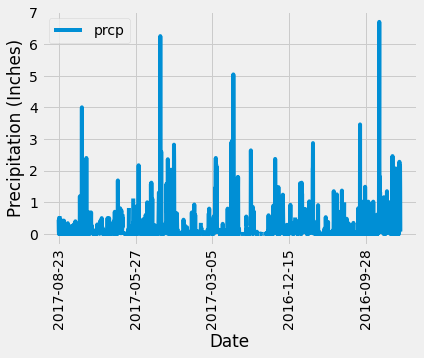

In [114]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_date=session.query(measurements.date).order_by(measurements.date.desc()).first()
#print(last_date) #2017-8-23
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print("Query Date: ", query_date)

# Perform a query to retrieve the data and precipitation scores
yr_prcp= session.query(measurements.date, measurements.prcp).\
    filter(measurements.date > query_date).\
    order_by(measurements.date).all()
#print(yr_prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(yr_prcp)
prcp_df=prcp_df.set_index('date')
#prcp_df

# Sort the dataframe by date
prcp_df= prcp_df.sort_values(['date'], ascending= False)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Precipitation (Inches)')

In [115]:
dict_convert=dict(yr_prcp)
dict_convert

{'2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 

In [116]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [117]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(func.count(stations.station)).all()
station_count

[(9)]

In [118]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Need to group by the station #, then count how many times measurements appear at each station
# and list in desc order 

active_stations= session.query(func.count(measurements.station), measurements.station).\
    group_by(measurements.station).order_by(desc(func.count(measurements.station))).all()
active_stations

#active_stations.order_by(desc(func.count(measurements.station)))

#.group_by(desc(measurements.station()))
#.order_by(func.count(measurements.station.desc()))
#group_by(measurements.station).order_by(func.count(measurements.station.desc()).all()
#.order_by(desc(func.count(measurements.station)

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [119]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#USC00519281
#most_active=[measurements.station, (measurements.station=="USC00519281").filter, func.avg(measurements.tobs)]
#station_activity=[(measurements.station=="USC00519281").filter, func.avg(measurements.tobs)]
#station_activity=session.query(measurements.station, measurements.tobs).filter(measurements.station=="USC00519281").all()
#station_summary= [measurements.tobs,
 #                func.avg(station_summary),
  #               func.min(station_summary),
   #              func.max(station_summary)]
select=[func.avg(measurements.tobs), func.min(measurements.tobs), func.max(measurements.tobs)]
#station_activity=session.query(measurements.station, measurements.tobs).filter(measurements.station=="USC00519281"), func.avg(measurements.tobs)
station_activity= session.query(*select).filter(measurements.station=="USC00519281").all()
station_activity
    
    #station_summary
#most_active= session.query((measurements.station)=="USC00519281").filter(func.avg(measurements.tobs)).all()
#most_active


[(71.66378066378067, 54.0, 85.0)]

Text(0, 0.5, 'frequency')

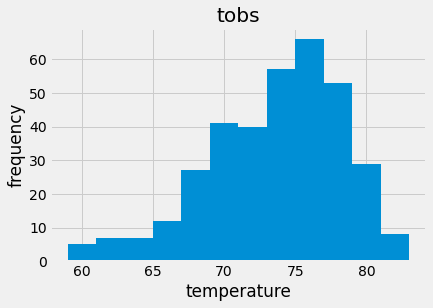

In [120]:
# Choose the station with the highest number of temperature observations.
#temp_observations= [measurements.station, measurements.tobs, func.count(measurements.tobs)]
#station_observations= session.query(*temp_observations).all()
#station_observations
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data=[measurements.tobs]
station_temp=session.query(*temp_data).filter(measurements.station=="USC00519281").filter(measurements.date>=query_date).all()
station_temp_df=pd.DataFrame(station_temp)
station_temp_df.hist(bins=12)
plt.xlabel("temperature")
plt.ylabel("frequency")


In [127]:
# temp_data=[measurements.tobs]
# station_temp=session.query(*temp_data).filter(measurements.station=="USC00519281").filter(measurements.date>=query_date).all()
# station_temp

In [128]:
# stations= session.query(stations.name).all()
# stations

In [123]:
# SELECT count(measurements.station) As count_1, measurements.station as station_count
#from measurements GROUP BY measurements.station
#()

#prcp_df[['Date', 'prcp']].describe()
   # order_by(desc(func.count(measurements.station))).all()


#sel= [measurements.station,
 #       func.sum(measurements.station)]
#sel
#active_stations= session.query(*sel).\
  #  group_by(measurements.station).\
 #   order_by(measurements.station).all()
#active_stations
 #   func.sum(measurements.station)
#active_stations



#station_count=(active_stations).sum()
#station_count
# order_by(measurements.station).all()
#active_stations



#active_stations= session.query(func.count(measurements.station)).all()
#active_stations

In [124]:
# plt.xticks(rotation=90)
# need function for sorting 
#result = df.sort(['A', 'B'], ascending=[1, 0])
#prcp= session.query(measurements.prcp, measurements.date).

#mean_prcp= np.mean(prcp_df)
#print(f"The mean yearly precipitation in Hawaii is {mean_prcp}")
# median_prcp= np.median(prcp_df)
#mode_prcp= np.mode
#print(median_prcp)

In [125]:
# Get a list of column names and types
#from sqlalchemy import create_engine, inspect, func
#inspector = inspect(engine)
#inspector.get_table_names()

#columns = inspector.get_columns('stations')
#for c in columns:
 #   print(c['name'], c["type"])
#columns

#print(f'The total number of stations in the dataset is {station_count}")
#stations=session.query(stations).count



#stations= session.query(measurements.date, measurements.prcp).\
 #   filter(measurements.date > query_date).\
  #  order_by(measurements.date).all()

## Bonus Challenge Assignment

In [126]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start, end):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start).filter(Measurement.date <= end).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
